In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import sys

sys.path.append('./results')

from plot_experiment_results import plot_experiment_results

# Graph

## Payload 1:5, Gates 200:205

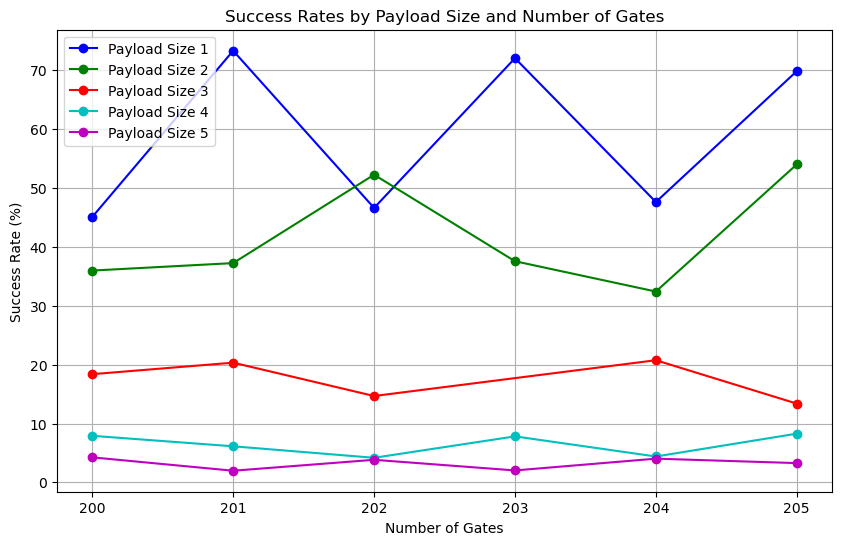

In [43]:
from results_1_5_200_205 import results_1_5_200_205

plot_experiment_results(results_1_5_200_205)

## Payload 1:4, Gates 500:505

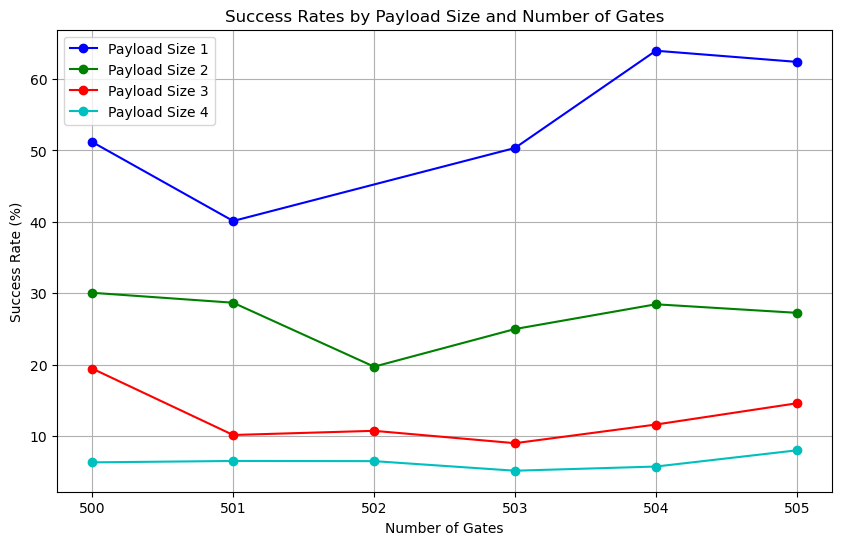

In [44]:
from results_1_4_500_505 import results_1_4_500_505

plot_experiment_results(results_1_4_500_505)

## Payload 1:4, Gates 1000:1005

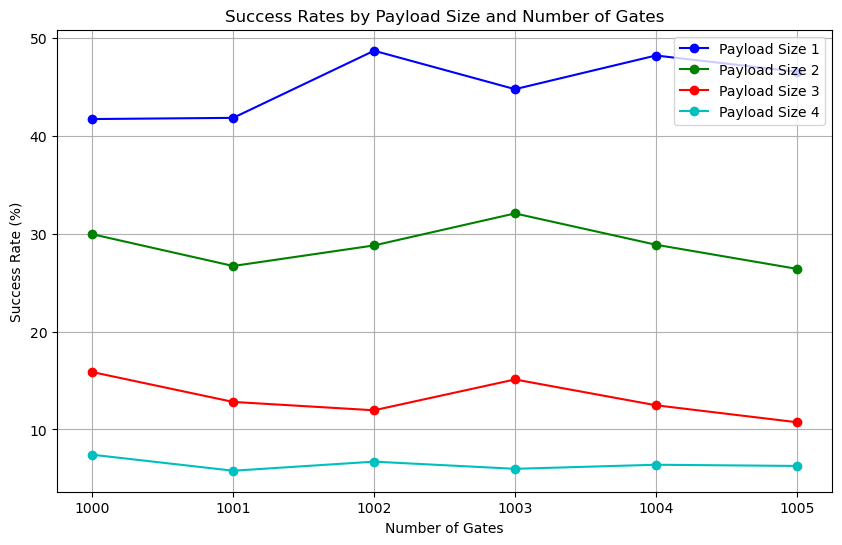

In [45]:
from results_1_4_1000_1005 import results_1_4_1000_1005

plot_experiment_results(results_1_4_1000_1005)

## Payload 1:4, Gates 1500:1505

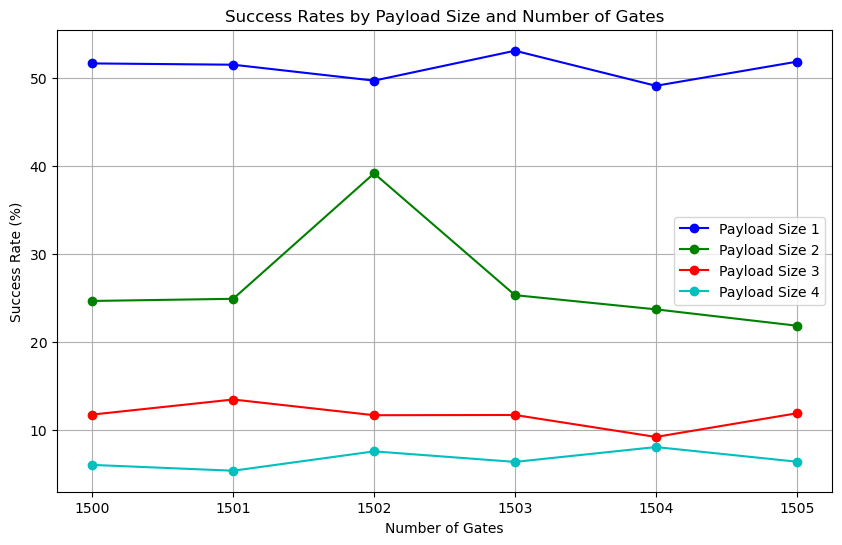

In [46]:
from results_1_4_1500_1505 import results_1_4_1500_1505

plot_experiment_results(results_1_4_1500_1505)

## Payload 1:4, Gates 2000:2005

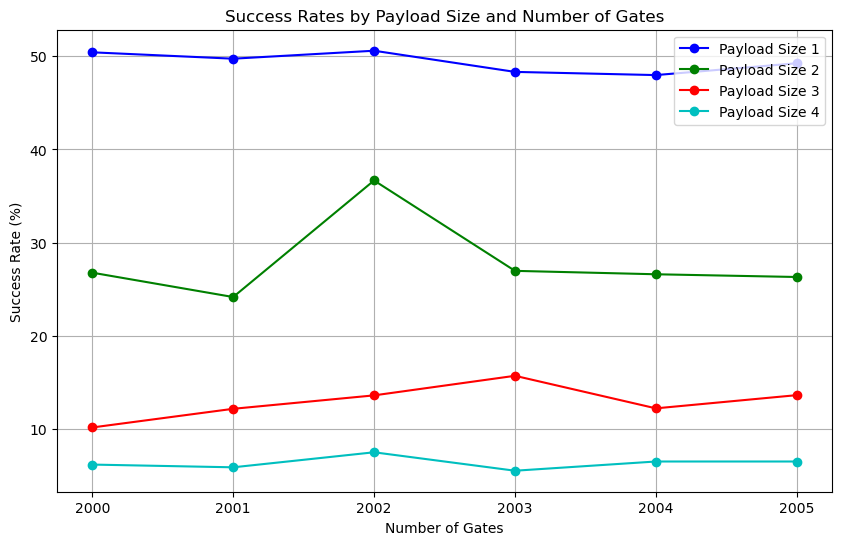

In [66]:
from results_1_4_2000_2005 import results_1_4_2000_2005

plot_experiment_results(results_1_4_2000_2005)

# Experiment analysis

In [84]:
from experiment_analysis import create_experiment_dataframe, plot_success_rates


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, cyv0974q5bwg0083nxqg to cytdeeh78z600082kpkg
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   payload_size   118 non-null    int64  
 1   num_gates      118 non-null    int64  
 2   success_rate   118 non-null    float64
 3   circuit_depth  118 non-null    int64  
 4   circuit_width  118 non-null    int64  
 5   circuit_size   118 non-null    int64  
 6   backend        116 non-null    object 
 7   counts_zeros   118 non-null    int64  
 8   counts_ones    118 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 9.2+ KB
None

Payload size distribution:
payload_size
1    29
2    30
3    29
4    30
dtype: int64

Counts distribution by payload size:

Payload size 1:
Average counts_zeros: 2115.14
Average counts_ones: 1980.86

Payload size 2:
Average counts_zeros: 1240.70
Average counts_ones: 2855.30

Payload size 3:
Aver

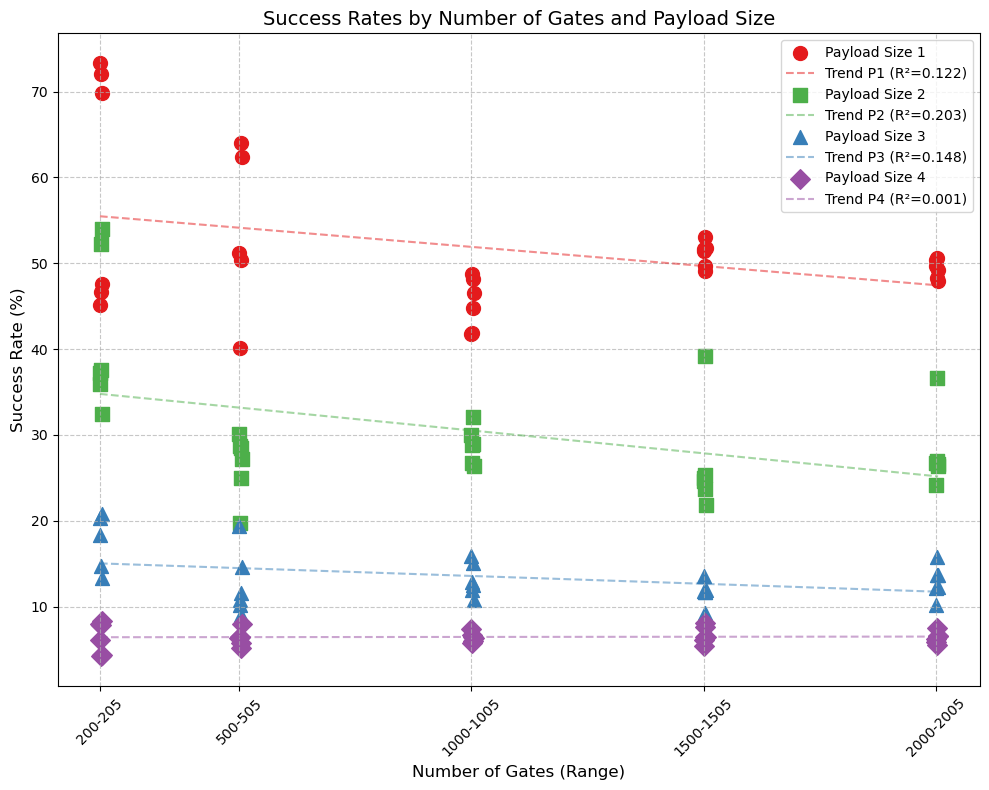

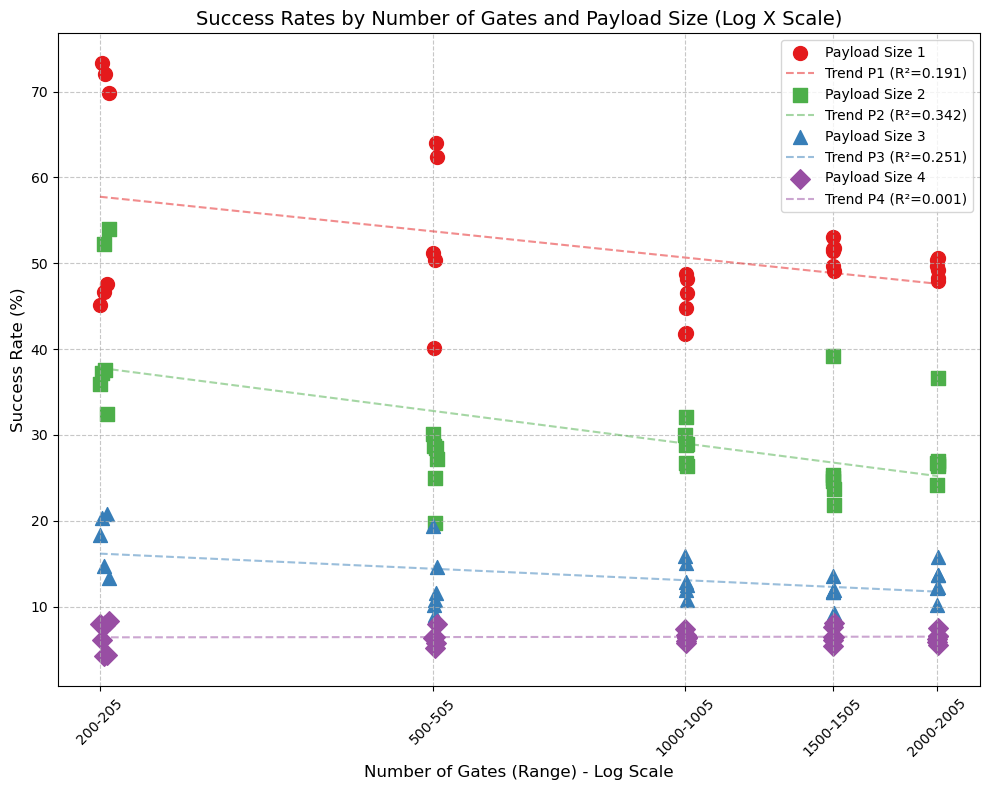

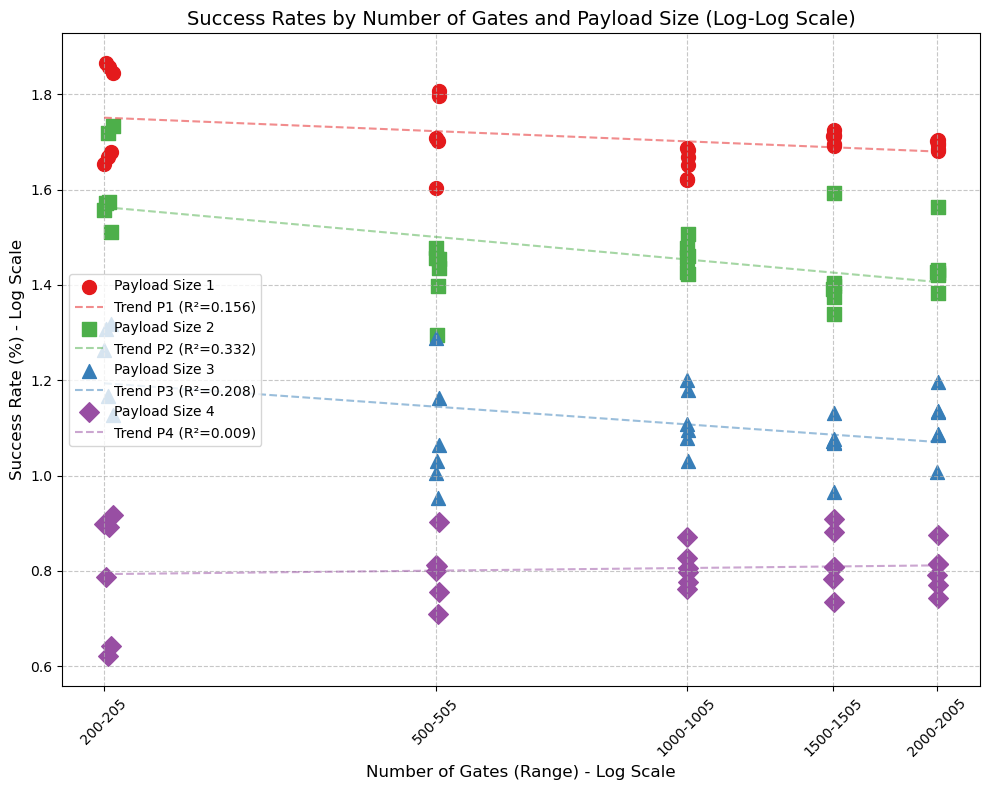

In [93]:
df = create_experiment_dataframe()
    
# Display basic information about the dataset
print("\nDataFrame Info:")
print(df.info())

print("\nPayload size distribution:")
print(df.groupby('payload_size').size())

# Show counts distribution for each payload size
print("\nCounts distribution by payload size:")
for size in sorted(df['payload_size'].unique()):
    subset = df[df['payload_size'] == size]
    print(f"\nPayload size {size}:")
    print(f"Average counts_zeros: {subset['counts_zeros'].mean():.2f}")
    print(f"Average counts_ones: {subset['counts_ones'].mean():.2f}")

# Create all three versions of the plot
print("\nRegression Statistics (Linear Scale):")
print("-"*50)
regression_stats = plot_success_rates(df, use_log_x=False, use_log_y=False)
for stats in regression_stats:
    print(f"\nPayload Size {stats['payload_size']}:")
    print(f"Slope: {stats['slope']:.2e} ± {stats['std_err']:.2e}")
    print(f"Intercept: {stats['intercept']:.2f}")
    print(f"R²: {stats['r_squared']:.3f}")
    print(f"p-value: {stats['p_value']:.2e}")
    print("-"*50)


print("\nRegression Statistics (Log X Scale):")
print("-"*50)
regression_stats_logx = plot_success_rates(df, use_log_x=True, use_log_y=False)
for stats in regression_stats_logx:
    print(f"\nPayload Size {stats['payload_size']}:")
    print(f"Slope: {stats['slope']:.2e} ± {stats['std_err']:.2e}")
    print(f"Intercept: {stats['intercept']:.2f}")
    print(f"R²: {stats['r_squared']:.3f}")
    print(f"p-value: {stats['p_value']:.2e}")
    print("-"*50)

print("\nRegression Statistics (Log-Log Scale):")
print("-"*50)
regression_stats_logxy = plot_success_rates(df, use_log_x=True, use_log_y=True)
for stats in regression_stats_logxy:
    print(f"\nPayload Size {stats['payload_size']}:")
    print(f"Slope: {stats['slope']:.2e} ± {stats['std_err']:.2e}")
    print(f"Intercept: {stats['intercept']:.2f}")
    print(f"R²: {stats['r_squared']:.3f}")
    print(f"p-value: {stats['p_value']:.2e}")
    print("-"*50)

In [67]:
from experiment_analysis import plot_success_rates

# circuit complexity


Generating Circuit Complexity Analysis Plots...
Circuit complexity plots saved as 'circuit_complexity_2d.png' and 'circuit_complexity_3d.png'


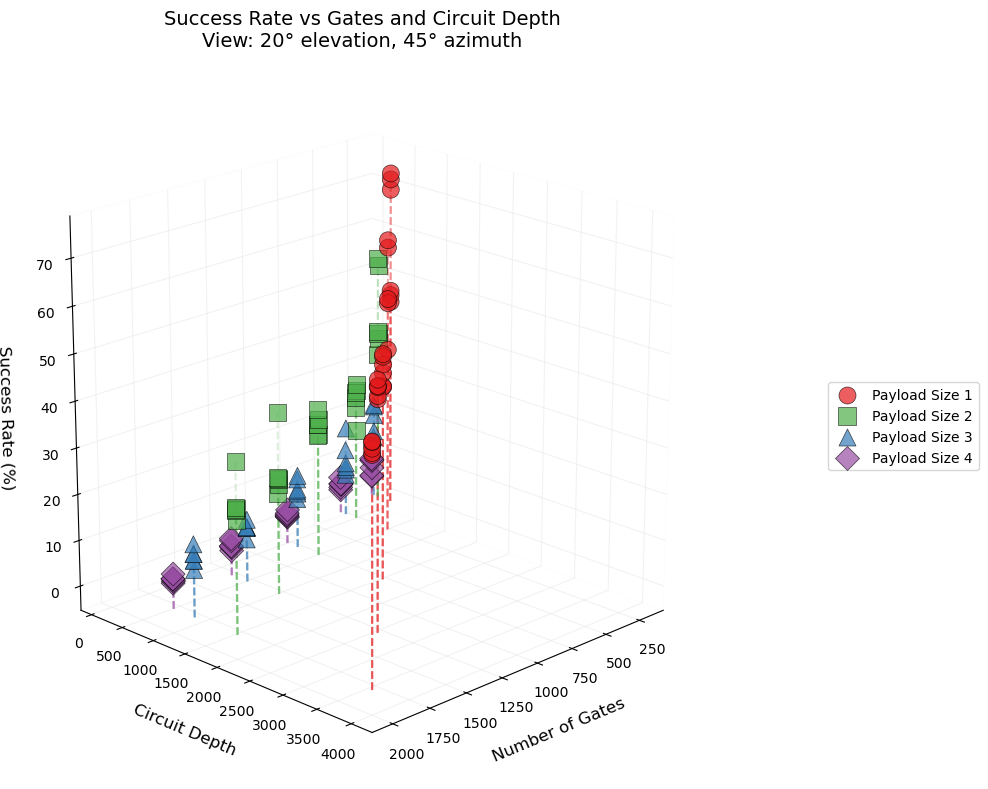

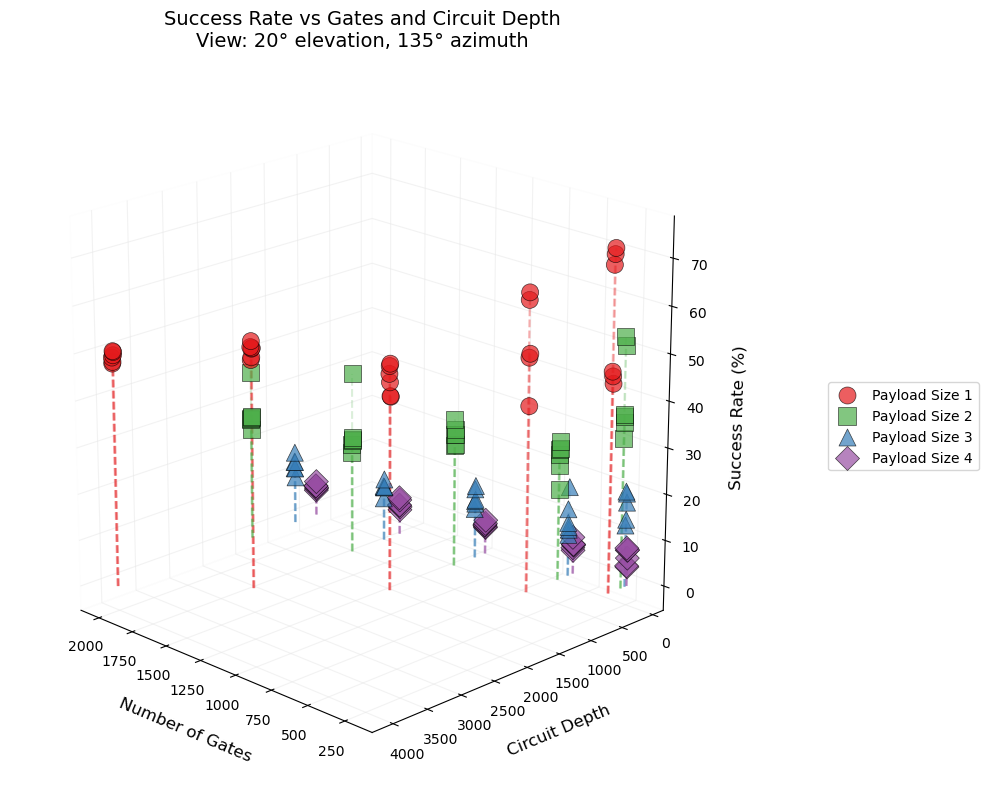

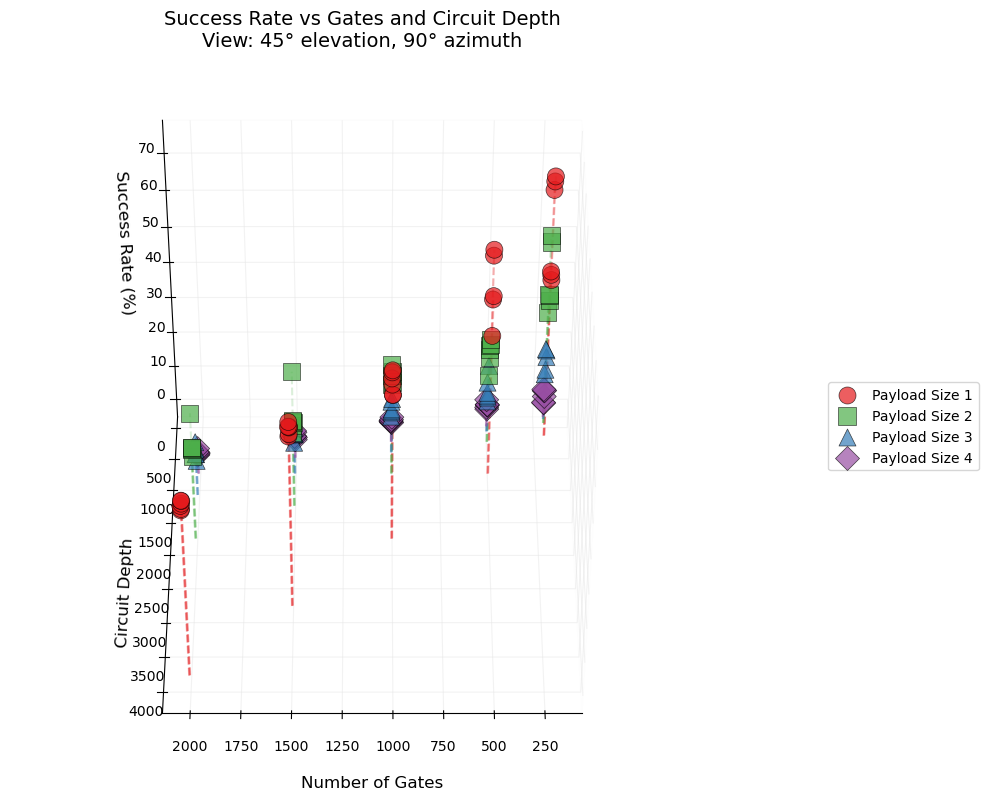

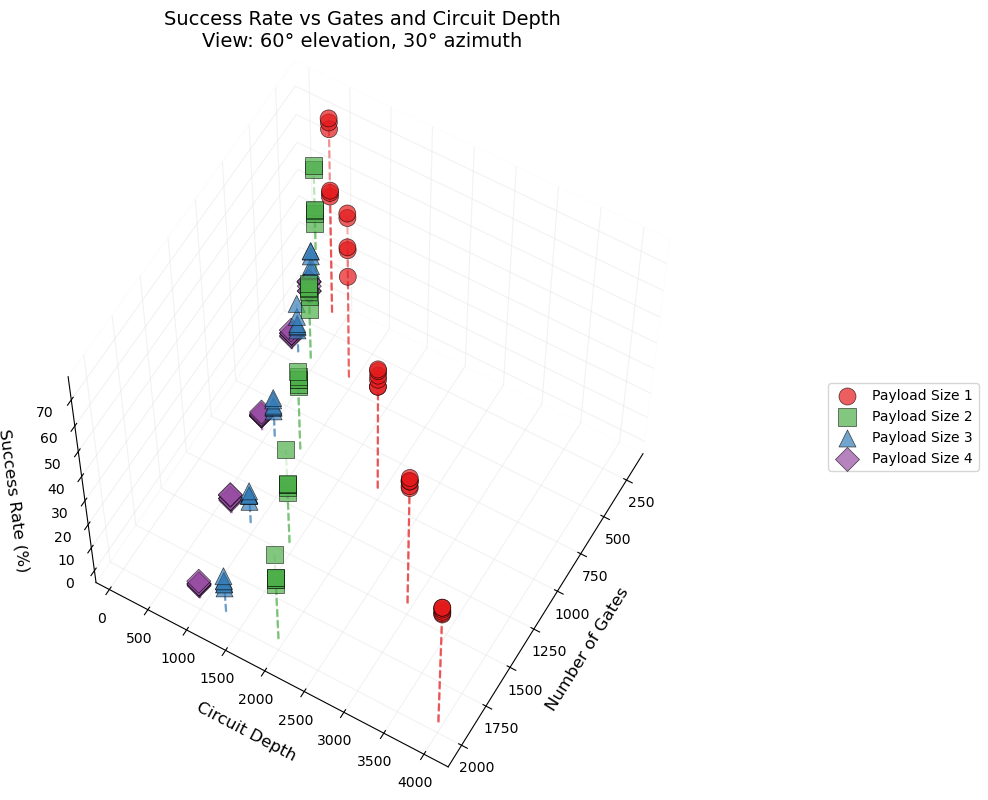

In [94]:
from experiment_analysis import plot_circuit_complexity, create_experiment_dataframe

df = create_experiment_dataframe()
print("\nGenerating Circuit Complexity Analysis Plots...")
plot_circuit_complexity(df)
print("Circuit complexity plots saved as 'circuit_complexity_2d.png' and 'circuit_complexity_3d.png'")

# Error


Generating Error Analysis Plots...
Error analysis plots saved as 'error_analysis.png'


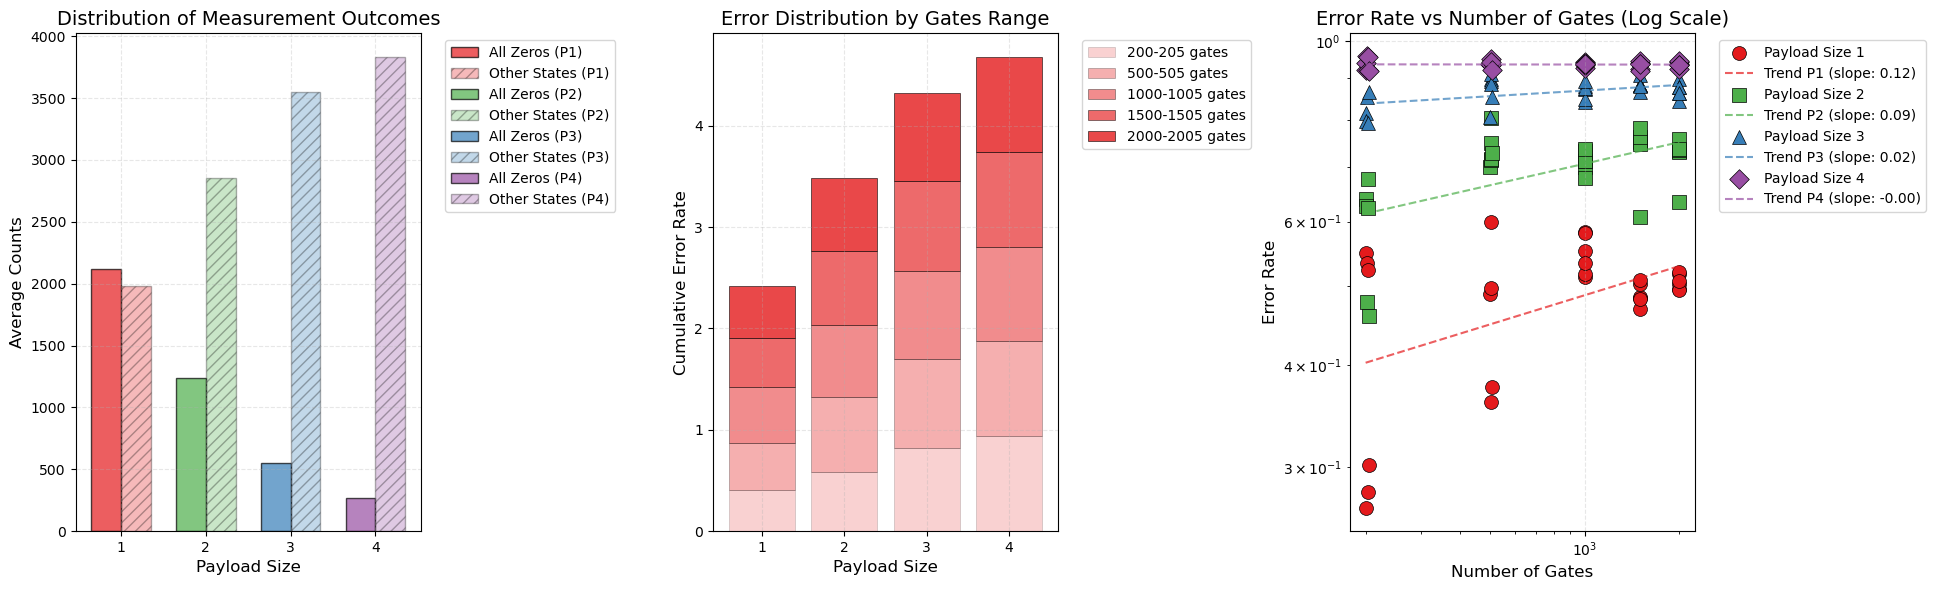

In [97]:
from experiment_analysis import plot_error_analysis, create_experiment_dataframe

df = create_experiment_dataframe()

print("\nGenerating Error Analysis Plots...")
plot_error_analysis(df)
print("Error analysis plots saved as 'error_analysis.png'")


Generating Cap-score Analysis Plot...
Cap-score analysis plot saved as 'cap_scores_analysis.png'


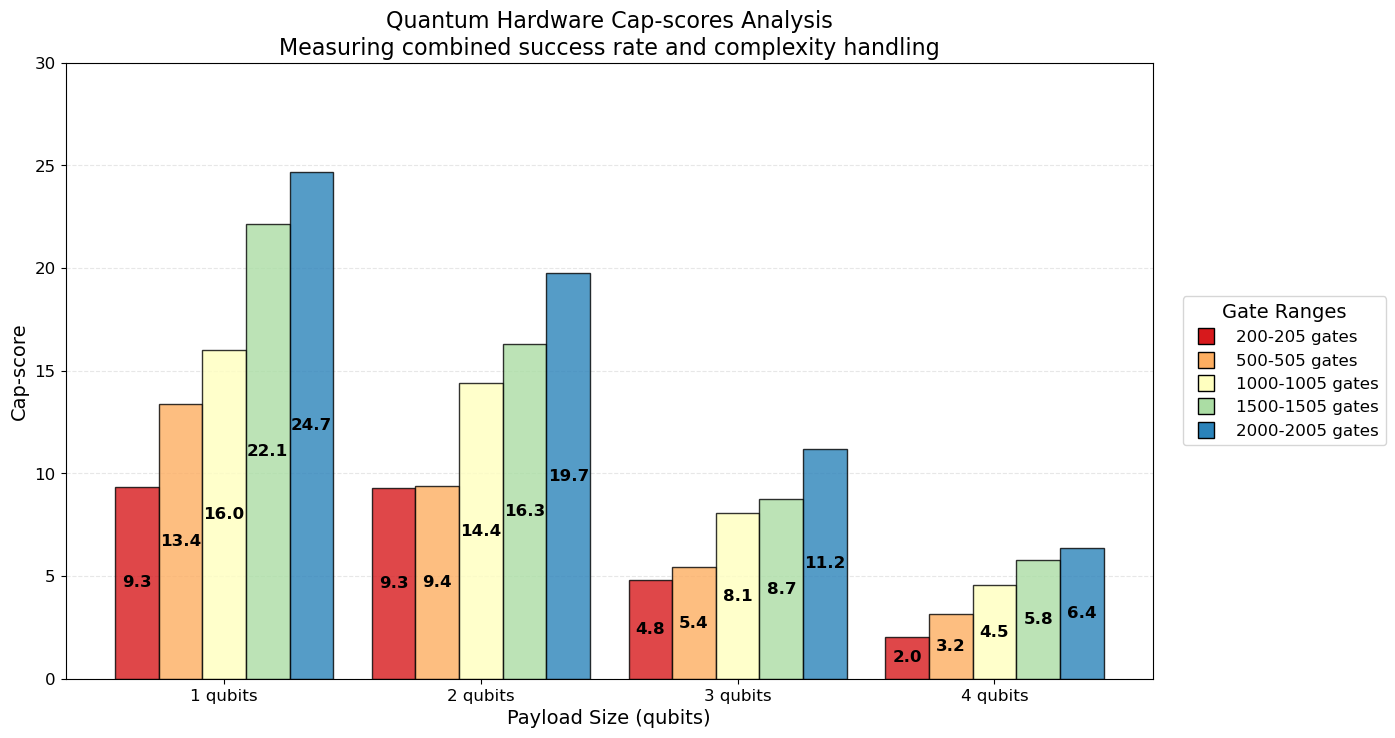

In [115]:
from experiment_analysis import plot_error_analysis, plot_cap_scores

df = create_experiment_dataframe()

print("\nGenerating Cap-score Analysis Plot...")
plot_cap_scores(df)
print("Cap-score analysis plot saved as 'cap_scores_analysis.png'")